In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)

import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
import umap

/Users/BOULLIERERWAN1/opt/anaconda3/envs/aicourse_py39/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Import the dataset

In [2]:
data_path = "../dataset/regularite-mensuelle-tgv-aqst.csv" 
df_base = pd.read_csv(data_path, sep=",")
df_base.head()

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,commentaire_retards_depart,nb_train_retard_arrivee,retard_moyen_arrivee,retard_moyen_tous_trains_arrivee,commentaires_retard_arrivee,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,3.693179,NaN,147,28.436735,6.511118,NaN,110,6.511118,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,0.095796,NaN,34,21.524020,5.696096,NaN,22,5.696096,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,1.003981,NaN,26,55.692308,7.578947,"Ce mois-ci, l'OD a été touchée par les inciden...",26,7.548387,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000
3,2018-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,1.966667,NaN,13,48.623077,6.790686,"Ce mois-ci, l'OD a été touchée par les inciden...",8,6.724757,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,0.886889,NaN,71,12.405164,3.346487,NaN,17,3.346487,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000


In [3]:
## Is missing values (seulement sur les commentaire que nous n'allons pas utiliser)
df_base.isna().sum()

date                                       0
service                                    0
gare_depart                                0
gare_arrivee                               0
duree_moyenne                              0
nb_train_prevu                             0
nb_annulation                              0
commentaire_annulation                  8154
nb_train_depart_retard                     0
retard_moyen_depart                        0
retard_moyen_tous_trains_depart            0
commentaire_retards_depart              8154
nb_train_retard_arrivee                    0
retard_moyen_arrivee                       0
retard_moyen_tous_trains_arrivee           0
commentaires_retard_arrivee             7456
nb_train_retard_sup_15                     0
retard_moyen_trains_retard_sup15           0
nb_train_retard_sup_30                     0
nb_train_retard_sup_60                     0
prct_cause_externe                         0
prct_cause_infra                           0
prct_cause

## Analyse des causes de retard

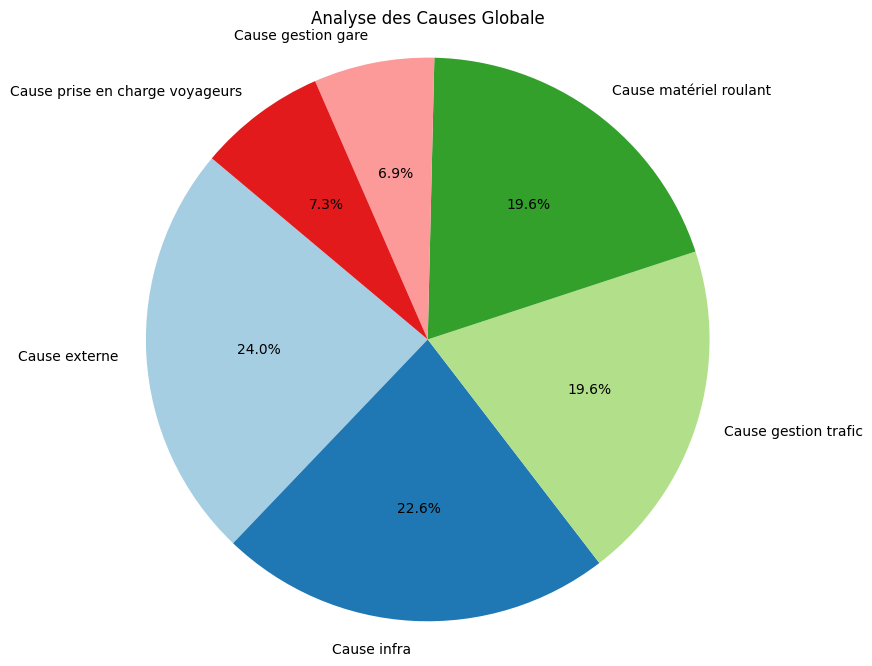

In [4]:
# Données pour le pie chart
causes = ["Cause externe", "Cause infra", "Cause gestion trafic", "Cause matériel roulant", "Cause gestion gare", "Cause prise en charge voyageurs"]
prct_causes = df_base[["prct_cause_externe", "prct_cause_infra", "prct_cause_gestion_trafic", "prct_cause_materiel_roulant", "prct_cause_gestion_gare", "prct_cause_prise_en_charge_voyageurs"]].mean()

# Créer un pie chart
plt.figure(figsize=(8, 8))
plt.pie(prct_causes, labels=causes, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(causes))))

# Titre
plt.title("Analyse des Causes Globale")

plt.axis('equal')  # Assurez-vous que le pie chart est un cercle.

plt.show()


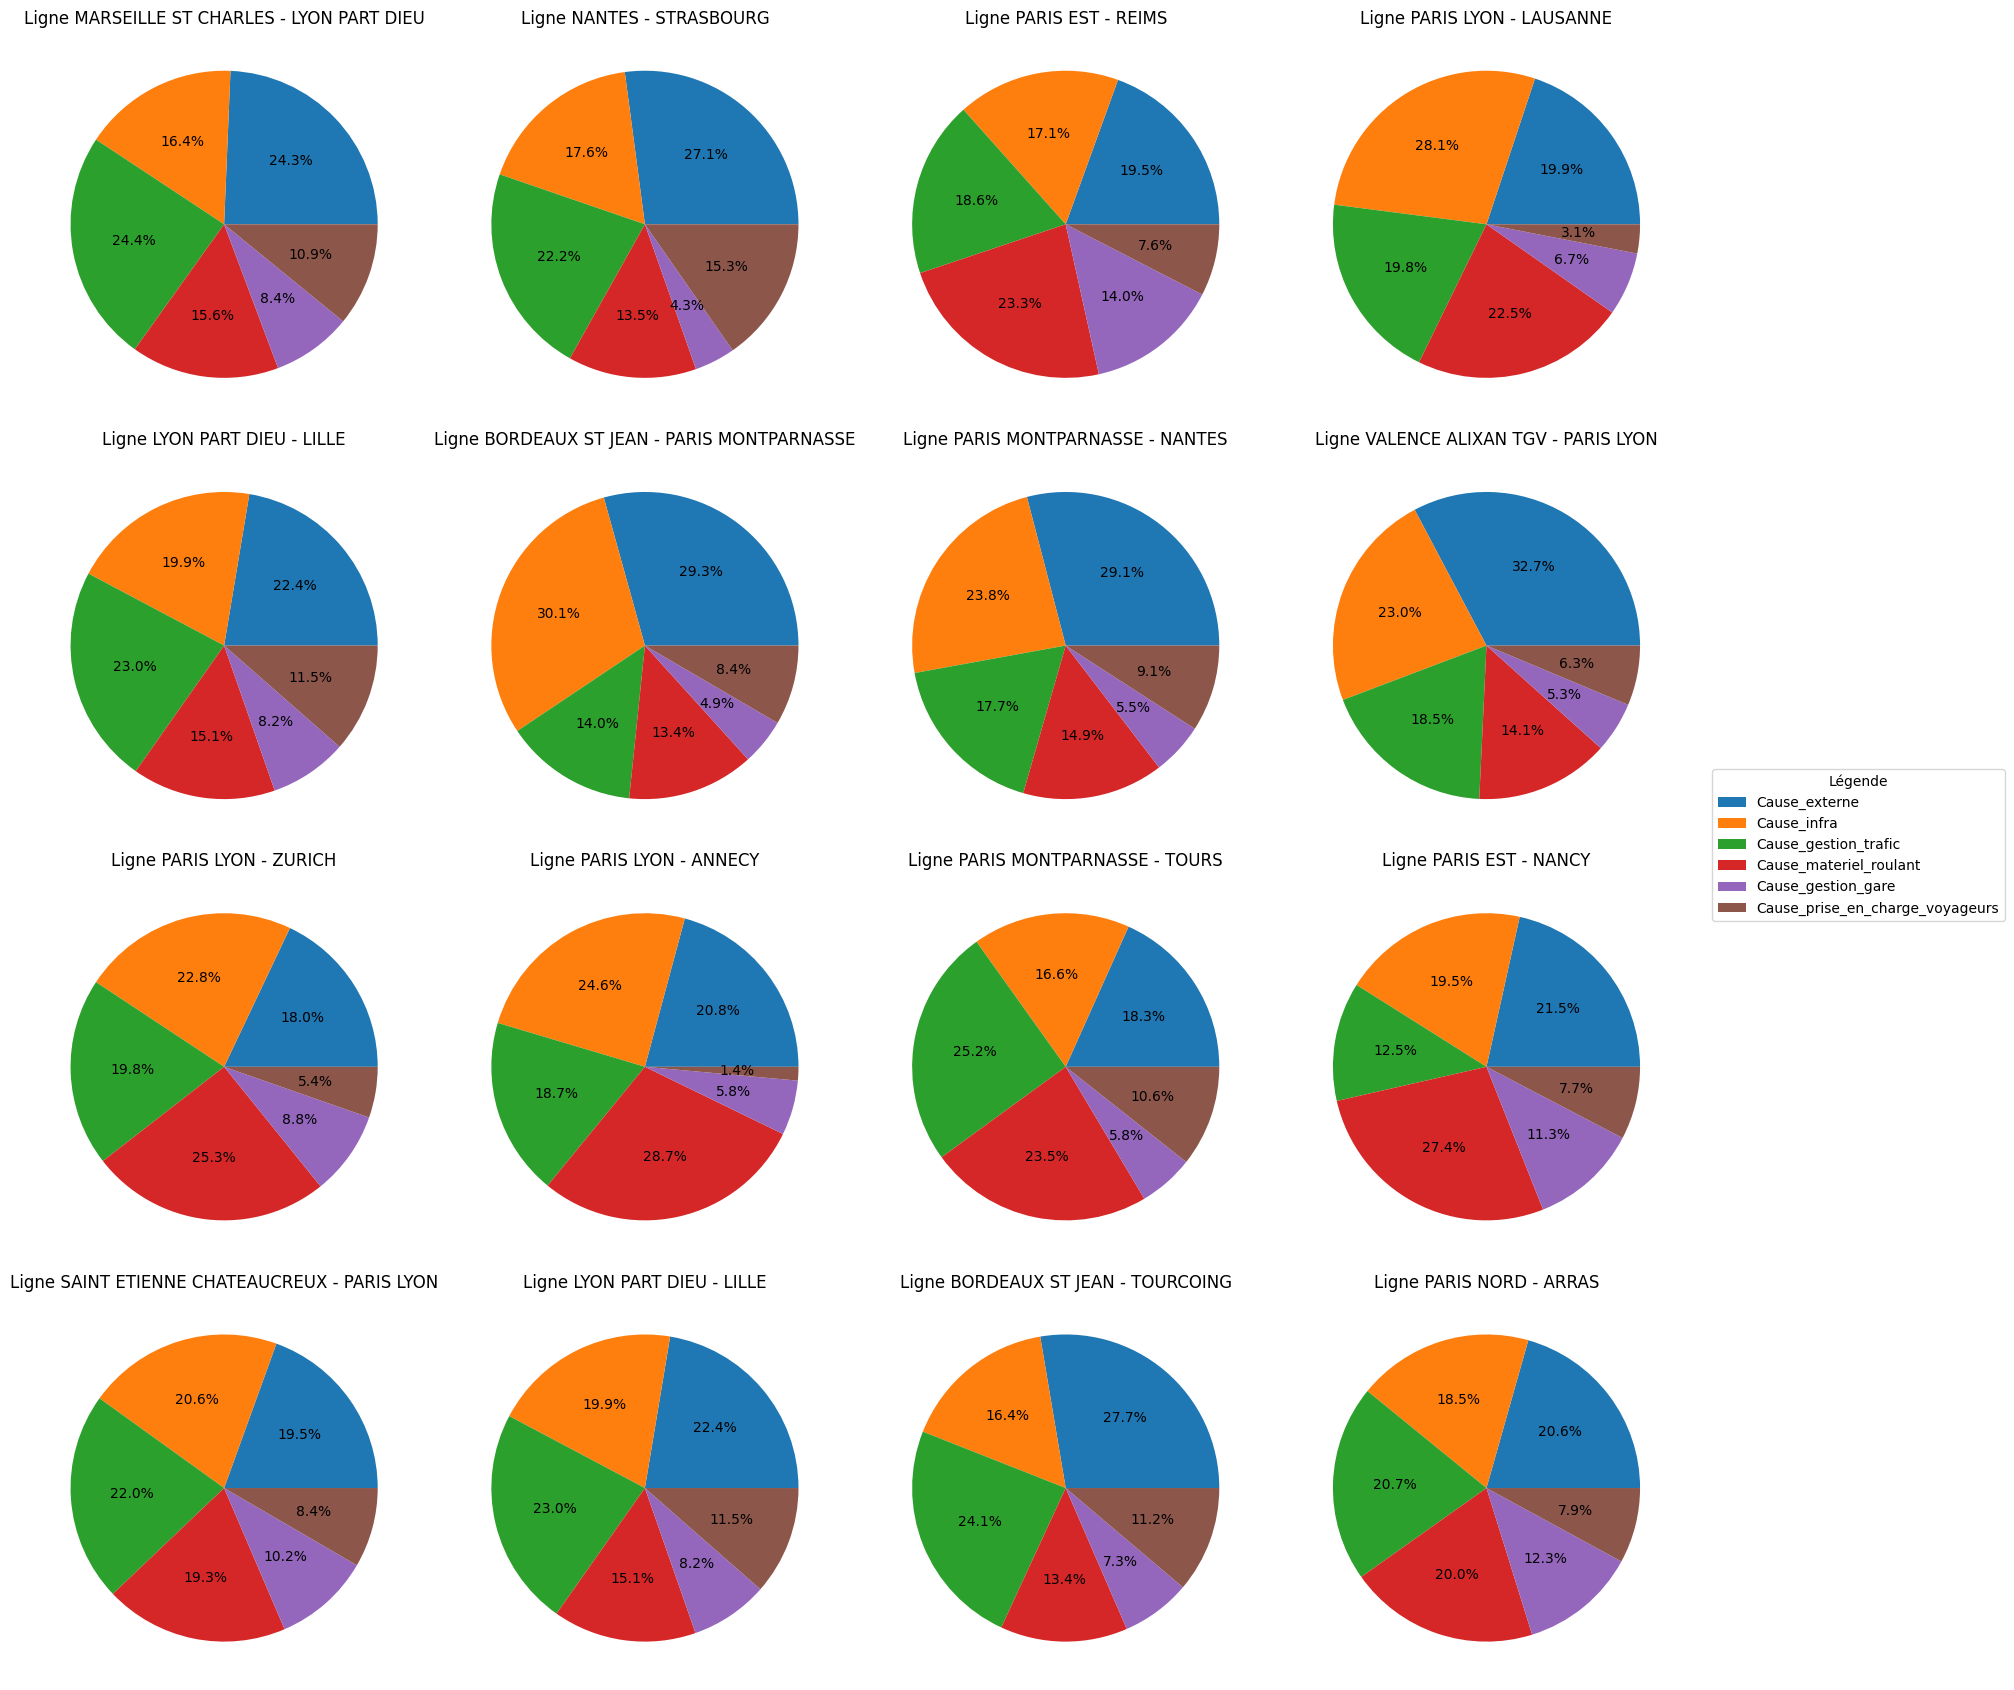

In [5]:
## Analyse par ligne et par cause
df_base['ligne'] = df_base['gare_depart']+ ' - ' + df_base['gare_arrivee']
df_base_groupby_ligne = df_base.groupby("ligne").agg(
    Cause_externe = ("prct_cause_externe",'mean'),
    Cause_infra = ("prct_cause_infra",'mean'),
    Cause_gestion_trafic = ("prct_cause_gestion_trafic",'mean'),
    Cause_materiel_roulant = ("prct_cause_materiel_roulant",'mean'),
    Cause_gestion_gare = ("prct_cause_gestion_gare",'mean'),
    Cause_prise_en_charge_voyageurs = ("prct_cause_prise_en_charge_voyageurs",'mean')
)


# Créez une liste pour stocker les 16 lignes sélectionnées
selected_lines = []

# Sélectionnez 16 lignes aléatoirement
for _ in range(16):
    selected_line = df_base_groupby_ligne.sample(1)
    selected_line = selected_line.reset_index()
    selected_lines.append(selected_line)

# Créez une grille de sous-graphiques de 4 lignes par 4 colonnes
fig, axes = plt.subplots(4, 4, figsize=(17, 17))


# Créez des graphiques pie pour chaque ligne sélectionnée
for i, selected_line in enumerate(selected_lines):
    # Réorganisez les données pour les rendre adaptées à un pie chart
    ligne_name = selected_line.ligne.values[0]
    selected_line = selected_line.drop(columns=['ligne']).T
    selected_line.columns = ['Pourcentage']

    # Créez un graphe pie
    ax = axes[i // 4, i % 4]
    wedges, texts, autotexts = ax.pie(selected_line['Pourcentage'], labels=[''] * len(selected_line.index), autopct='%1.1f%%')
    ax.set_title(f"Ligne {ligne_name}")

# Ajustez l'espacement entre les graphiques
plt.tight_layout()

# Créez une légende commune en dehors de la grille
legend_labels = ['Cause_externe', 'Cause_infra', 'Cause_gestion_trafic', 'Cause_materiel_roulant', 'Cause_gestion_gare', 'Cause_prise_en_charge_voyageurs']
fig.legend(wedges, legend_labels, loc="center left", bbox_to_anchor=(1, 0.5), title="Légende")


# Affichez les graphiques
plt.show()


## Analyse sur l'évolution temporelle du retard

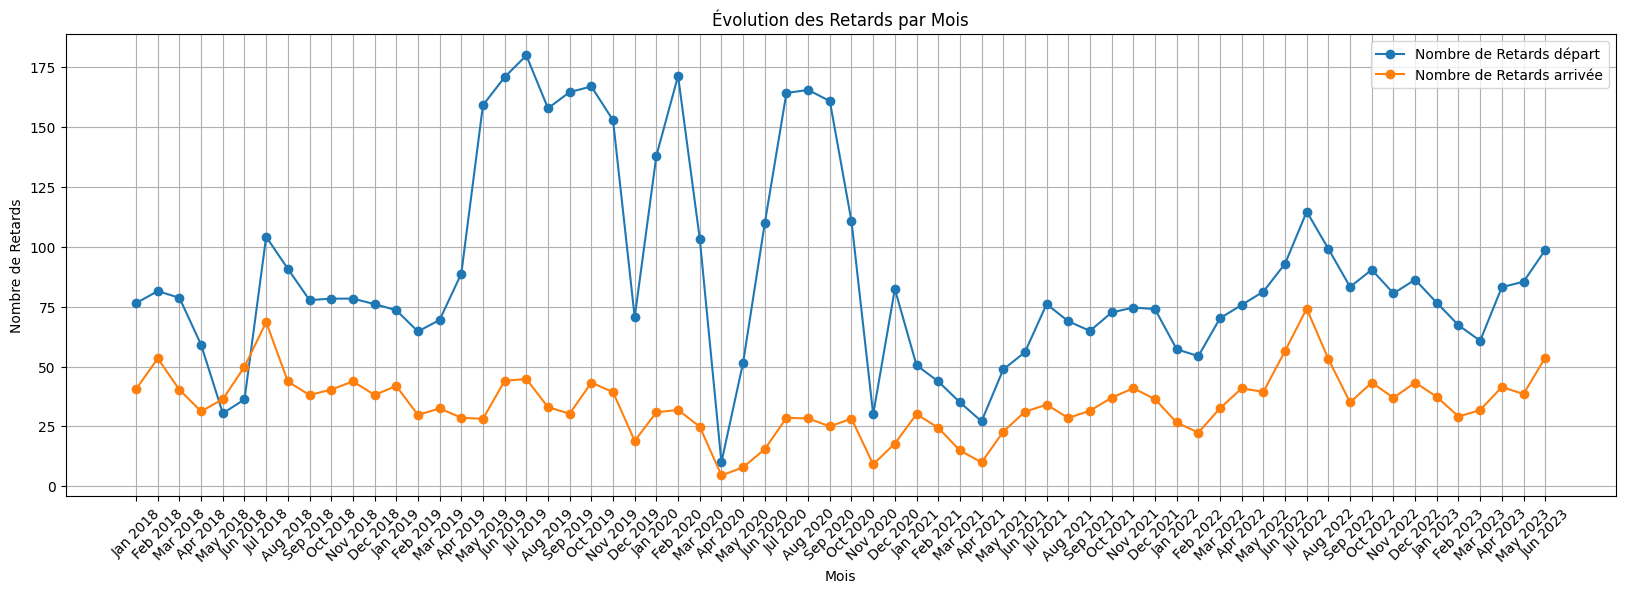

In [6]:
## Evolution train en retard au départ par mois 
df_month_group_by_month = df_base.groupby("date")[["nb_train_depart_retard", "nb_train_retard_arrivee"]].mean().reset_index()
df_month_group_by_month['date'] = pd.to_datetime(df_month_group_by_month['date'])
df_month_group_by_month['date'] = df_month_group_by_month['date'].dt.to_period('M')
df_month_group_by_month = df_month_group_by_month.set_index("date")
df_month_group_by_month.index = df_month_group_by_month.index.strftime('%b %Y')

plt.figure(figsize=(20, 6))
plt.plot(df_month_group_by_month.index, df_month_group_by_month["nb_train_depart_retard"], marker='o', label='Nombre de Retards départ')
plt.plot(df_month_group_by_month.index, df_month_group_by_month["nb_train_retard_arrivee"], marker='o', label='Nombre de Retards arrivée')
plt.title("Évolution des Retards par Mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de Retards")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()


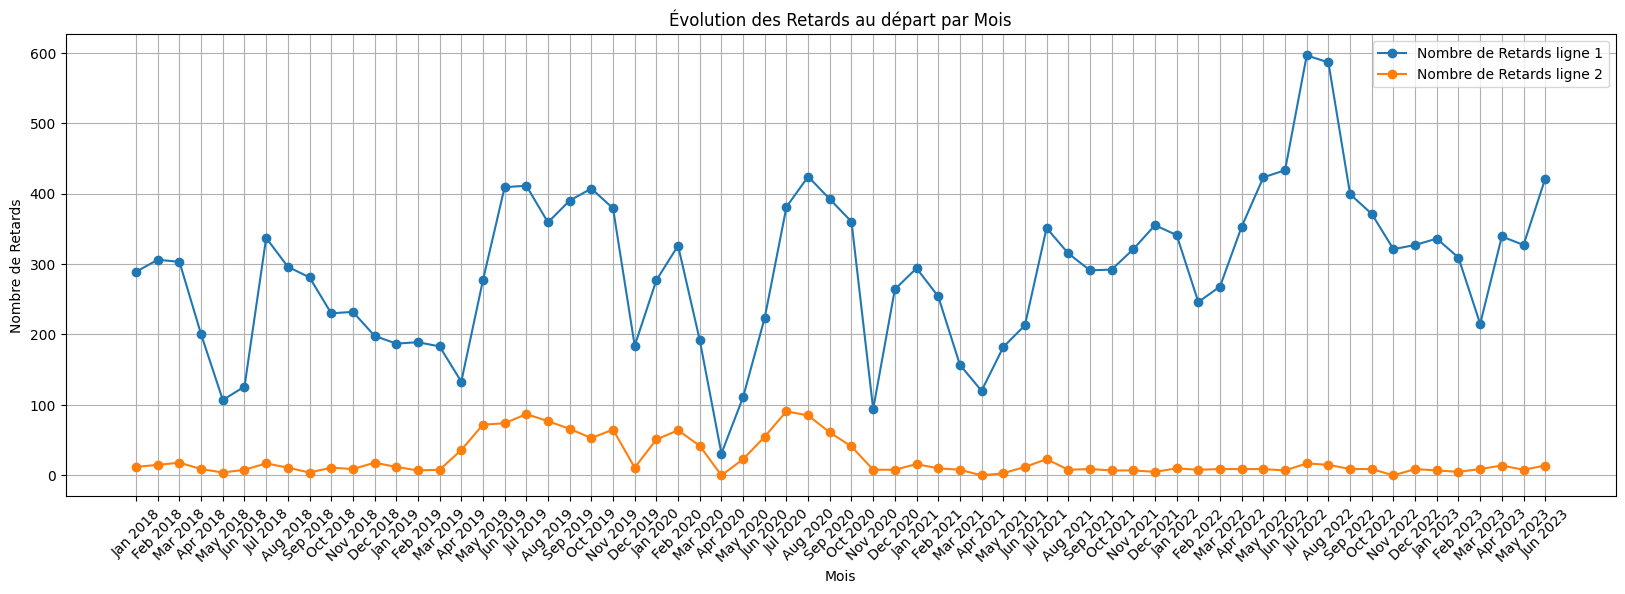

In [7]:
## Evolution Temps de retard par mois sur une ligne 
df_base['ligne'] = df_base['gare_depart']+ ' - ' + df_base['gare_arrivee']
ligne_selected_1 = "BORDEAUX ST JEAN - PARIS MONTPARNASSE"
ligne_selected_2 = "PARIS MONTPARNASSE - ST MALO"
df_ligne_selected_1 = df_base[df_base.ligne == ligne_selected_1][['date', 'nb_train_depart_retard']]
df_ligne_selected_1['date'] = pd.to_datetime(df_ligne_selected_1['date'])
df_ligne_selected_1['date'] = df_ligne_selected_1['date'].dt.to_period('M')

df_ligne_selected_1 = df_ligne_selected_1.set_index("date")
df_ligne_selected_1.index = df_ligne_selected_1.index.strftime('%b %Y')

df_ligne_selected_2 = df_base[df_base.ligne == ligne_selected_2][['date', 'nb_train_depart_retard']]
df_ligne_selected_2['date'] = pd.to_datetime(df_ligne_selected_2['date'])
df_ligne_selected_2['date'] = df_ligne_selected_2['date'].dt.to_period('M')

df_ligne_selected_2 = df_ligne_selected_2.set_index("date")
df_ligne_selected_2.index = df_ligne_selected_2.index.strftime('%b %Y')

# Créez un graphique pour l'évolution des retards par mois
plt.figure(figsize=(20, 6))
plt.plot(df_ligne_selected_1.index, df_ligne_selected_1["nb_train_depart_retard"], marker='o', label='Nombre de Retards ligne 1')
plt.plot(df_ligne_selected_2.index, df_ligne_selected_2["nb_train_depart_retard"], marker='o', label='Nombre de Retards ligne 2')
plt.title("Évolution des Retards au départ par Mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de Retards")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()


## Correlation Analysis 

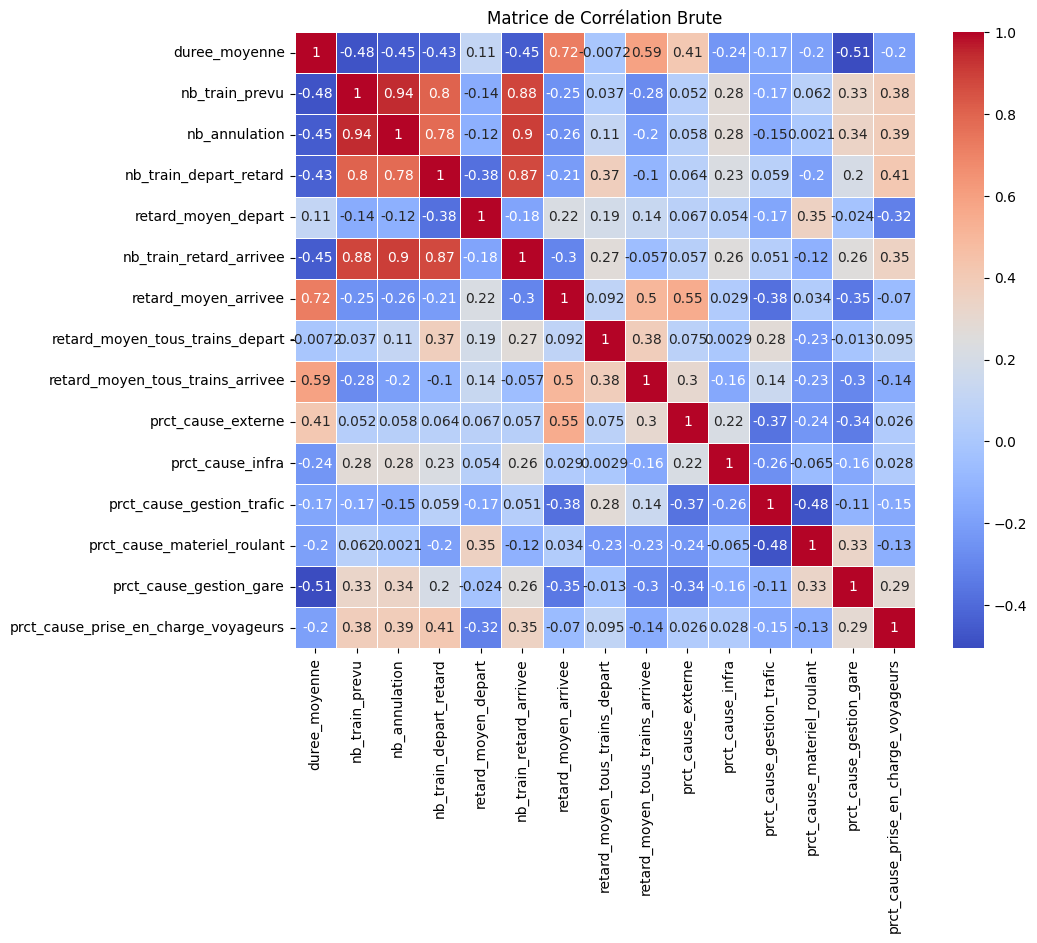

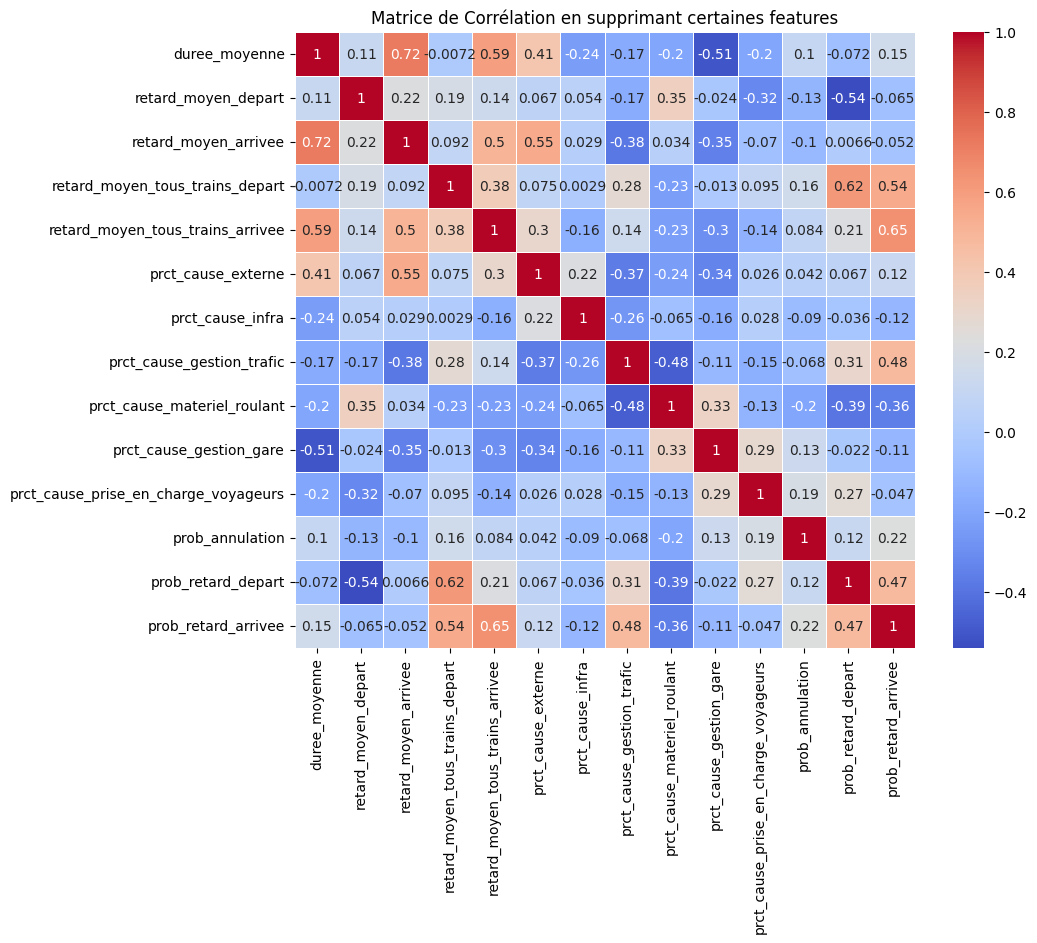

In [8]:
df_groupeby_ligne_bis = df_base.groupby("ligne").agg(
    duree_moyenne = ("duree_moyenne", "mean"),
    nb_train_prevu = ("nb_train_prevu", "mean"),
    nb_annulation = ("nb_annulation", "mean"),
    nb_train_depart_retard = ("nb_train_depart_retard", "mean"),
    retard_moyen_depart = ("retard_moyen_depart", "mean"),
    nb_train_retard_arrivee = ("nb_train_retard_arrivee", "mean"),
    retard_moyen_arrivee = ("retard_moyen_arrivee", "mean"),
    retard_moyen_tous_trains_depart = ("retard_moyen_tous_trains_depart", "mean"),
    retard_moyen_tous_trains_arrivee = ("retard_moyen_tous_trains_arrivee", "mean"),
    prct_cause_externe = ("prct_cause_externe", "mean"),
    prct_cause_infra = ("prct_cause_infra", "mean"),
    prct_cause_gestion_trafic = ("prct_cause_gestion_trafic", "mean"),
    prct_cause_materiel_roulant = ("prct_cause_materiel_roulant", "mean"),
    prct_cause_gestion_gare = ("prct_cause_gestion_gare", "mean"),
    prct_cause_prise_en_charge_voyageurs = ("prct_cause_prise_en_charge_voyageurs", "mean"),
)

df_corr_matrix = df_groupeby_ligne_bis.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation Brute")
plt.show()

## Create dimension with no correlation 

df_groupeby_ligne_bis["prob_annulation"] = df_groupeby_ligne_bis["nb_annulation"] / df_groupeby_ligne_bis["nb_train_prevu"]
df_groupeby_ligne_bis["prob_retard_depart"] = df_groupeby_ligne_bis["nb_train_depart_retard"] / df_groupeby_ligne_bis["nb_train_prevu"]
df_groupeby_ligne_bis["prob_retard_arrivee"] = df_groupeby_ligne_bis["nb_train_retard_arrivee"] / df_groupeby_ligne_bis["nb_train_prevu"]

df_groupeby_ligne_bis.drop(columns=["nb_annulation", "nb_train_depart_retard", "nb_train_retard_arrivee","nb_train_prevu"], inplace=True)

df_corr_matrix = df_groupeby_ligne_bis.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation en supprimant certaines features")
plt.show()

## Data reduction pour identifier des clusters de ligne 

Try to indentify clusters of train lines

In [9]:
df_base.head(5)

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,commentaire_retards_depart,nb_train_retard_arrivee,retard_moyen_arrivee,retard_moyen_tous_trains_arrivee,commentaires_retard_arrivee,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs,ligne
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,3.693179,NaN,147,28.436735,6.511118,NaN,110,6.511118,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336,BORDEAUX ST JEAN - PARIS MONTPARNASSE
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,0.095796,NaN,34,21.524020,5.696096,NaN,22,5.696096,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000,LA ROCHELLE VILLE - PARIS MONTPARNASSE
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,1.003981,NaN,26,55.692308,7.578947,"Ce mois-ci, l'OD a été touchée par les inciden...",26,7.548387,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000,PARIS MONTPARNASSE - QUIMPER
3,2018-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,1.966667,NaN,13,48.623077,6.790686,"Ce mois-ci, l'OD a été touchée par les inciden...",8,6.724757,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000,PARIS MONTPARNASSE - ST MALO
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,0.886889,NaN,71,12.405164,3.346487,NaN,17,3.346487,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000,PARIS MONTPARNASSE - ST PIERRE DES CORPS


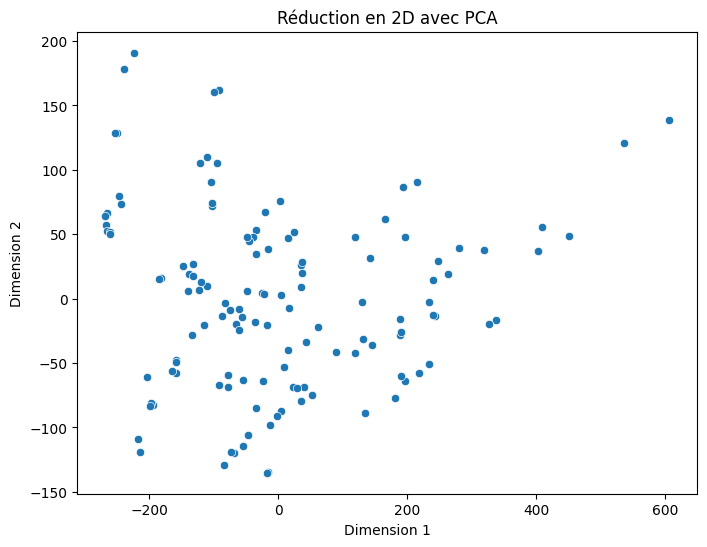

In [10]:
df = df_base.groupby("ligne").agg(
    duree_moyenne = ("duree_moyenne", "mean"),
    nb_train_prevu = ("nb_train_prevu", "mean"),
    nb_annulation = ("nb_annulation", "mean"),
    nb_train_depart_retard = ("nb_train_depart_retard", "mean"),
    retard_moyen_depart = ("retard_moyen_depart", "mean"),
    nb_train_retard_arrivee = ("nb_train_retard_arrivee", "mean"),
    retard_moyen_arrivee = ("retard_moyen_arrivee", "mean"),
    retard_moyen_tous_trains_depart = ("retard_moyen_tous_trains_depart", "mean"),
    retard_moyen_tous_trains_arrivee = ("retard_moyen_tous_trains_arrivee", "mean"),
    prct_cause_externe = ("prct_cause_externe", "mean"),
    prct_cause_infra = ("prct_cause_infra", "mean"),
    prct_cause_gestion_trafic = ("prct_cause_gestion_trafic", "mean"),
    prct_cause_materiel_roulant = ("prct_cause_materiel_roulant", "mean"),
    prct_cause_gestion_gare = ("prct_cause_gestion_gare", "mean"),
    prct_cause_prise_en_charge_voyageurs = ("prct_cause_prise_en_charge_voyageurs", "mean"),
    nb_train_retard_sup_15 = ("nb_train_retard_sup_15", "mean"),
    retard_moyen_trains_retard_sup15 = ("retard_moyen_trains_retard_sup15", "mean"),
    nb_train_retard_sup_30 = ("nb_train_retard_sup_30", "mean"),
    nb_train_retard_sup_60 = ("nb_train_retard_sup_60", "mean"),
)

# Appliquez PCA pour réduire en 2 dimensions
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df)

# Créez un dataframe à partir des données réduites en 2D
df_2d = pd.DataFrame(data_2d, columns=['Dimension 1', 'Dimension 2'])

# Tracez les données en 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', data=df_2d)
plt.title("Réduction en 2D avec PCA")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

Text(0.5, 1.0, 'UMAP projection of the Trains dataset')

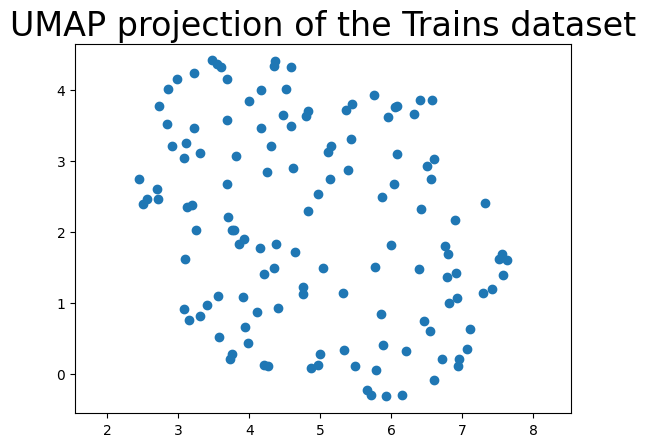

In [11]:
from sklearn.preprocessing import StandardScaler

reducer = umap.UMAP()
sclaed_df = StandardScaler().fit_transform(df)
embedding = reducer.fit_transform(sclaed_df)
embedding.shape

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Trains dataset', fontsize=24)

## Construction of the preprocessing pipeline

In [12]:
df_base.head(10)

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,commentaire_retards_depart,nb_train_retard_arrivee,retard_moyen_arrivee,retard_moyen_tous_trains_arrivee,commentaires_retard_arrivee,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs,ligne
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,3.693179,NaN,147,28.436735,6.511118,NaN,110,6.511118,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336,BORDEAUX ST JEAN - PARIS MONTPARNASSE
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,0.095796,NaN,34,21.524020,5.696096,NaN,22,5.696096,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000,LA ROCHELLE VILLE - PARIS MONTPARNASSE
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,1.003981,NaN,26,55.692308,7.578947,"Ce mois-ci, l'OD a été touchée par les inciden...",26,7.548387,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000,PARIS MONTPARNASSE - QUIMPER
3,2018-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,1.966667,NaN,13,48.623077,6.790686,"Ce mois-ci, l'OD a été touchée par les inciden...",8,6.724757,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000,PARIS MONTPARNASSE - ST MALO
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,0.886889,NaN,71,12.405164,3.346487,NaN,17,3.346487,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000,PARIS MONTPARNASSE - ST PIERRE DES CORPS
5,2018-01,National,QUIMPER,PARIS MONTPARNASSE,223,256,1,NaN,9,16.333333,0.579477,NaN,21,39.095238,5.940850,NaN,21,5.917643,9,2,27.777778,55.555556,0.000000,5.555556,5.555556,5.555556,QUIMPER - PARIS MONTPARNASSE
6,2018-01,National,RENNES,LYON PART DIEU,233,99,0,NaN,23,3.000000,0.696970,NaN,6,40.058333,2.244613,"Ce mois-ci, l'OD a été touchée par les inciden...",6,2.244613,2,1,0.000000,50.000000,25.000000,25.000000,0.000000,0.000000,RENNES - LYON PART DIEU
7,2018-01,National,ST PIERRE DES CORPS,PARIS MONTPARNASSE,61,410,1,NaN,173,6.719268,2.954808,NaN,114,13.045614,4.359739,"Ce mois-ci, l'OD a été touchée par les inciden...",26,4.359739,9,0,22.727273,45.454545,16.666667,12.121212,1.515152,1.515152,ST PIERRE DES CORPS - PARIS MONTPARNASSE
8,2018-01,National,TOURS,PARIS MONTPARNASSE,75,194,0,NaN,12,5.727778,0.333076,NaN,35,11.131429,2.929296,NaN,7,2.929296,1,0,25.000000,56.250000,6.250000,12.500000,0.000000,0.000000,TOURS - PARIS MONTPARNASSE
9,2018-01,National,NANTES,STRASBOURG,303,39,0,NaN,22,2.835606,1.664957,NaN,5,32.986667,5.741026,NaN,5,5.741026,2,1,0.000000,0.000000,33.333333,33.333333,0.000000,33.333333,NANTES - STRASBOURG


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer

# Define your pipelines
num_pipeline = Pipeline([
    ('std_scaler', MinMaxScaler())
])

cat_pipeline = Pipeline([
    ('oneHotEncoder', OneHotEncoder())
])

vec_pipeline = Pipeline([
    ('text_to_vec', CountVectorizer())
])

numerical_features = ["duree_moyenne", "nb_train_prevu", "nb_train_depart_retard", "retard_moyen_depart" ,"retard_moyen_tous_trains_depart", "nb_train_retard_arrivee", "retard_moyen_arrivee", "retard_moyen_tous_trains_arrivee"]
text_features = ["ligne"]
categorical_features = ["service"]

# Create a ColumnTransformer
sncf_data_transformer = ColumnTransformer([
    ("num", num_pipeline, numerical_features),
    # ("cat", cat_pipeline, categorical_features),
    # ("txt", vec_pipeline, text_features)
])
## To try to passe the ligne as a vector in the pipeline


In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt


X = df_base[numerical_features+categorical_features]
y = df_base[["prct_cause_externe","prct_cause_infra", "prct_cause_gestion_trafic", "prct_cause_gestion_gare", "prct_cause_materiel_roulant", "prct_cause_prise_en_charge_voyageurs"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
X_train_scaled = sncf_data_transformer.fit_transform(X_train)
reg = xgb.XGBRegressor(
    tree_method="hist",
    eval_metric=mean_squared_error,
)
reg = reg.fit(X_train_scaled, y_train)

X_test_scaled = sncf_data_transformer.transform(X_test)

/Users/BOULLIERERWAN1/opt/anaconda3/envs/aicourse_py39/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/BOULLIERERWAN1/opt/anaconda3/envs/aicourse_py39/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/BOULLIERERWAN1/opt/anaconda3/envs/aicourse_py39/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/BOULLIERERWAN1/opt/anaconda3/envs/aicourse_py39/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical

In [15]:
def evaluate_model_regressor(model, X_test_scaled, y_test): 
    y_pred = model.predict(X_test_scaled)
    overall_rmse = sqrt(mean_squared_error(y_test, y_pred))
    print(f'Overall RMSE: {overall_rmse}')
    print("------------------")
    # Make sure the shapes match
    if y_pred.shape[0] != y_test.shape[0] or y_pred.shape[1] != y_test.shape[1]:
        raise ValueError("Shapes of y_pred and y_test do not match")

    # Initialize a list to store RMSE values for each column
    rmse_list = []
    # Iterate through each column
    for col in range(y_test.shape[1]):
        # Calculate RMSE for the current column
        col_name = y_test.columns[col]
        rmse = sqrt(mean_squared_error(y_test.iloc[:, col], y_pred[:, col]))
        
        # Append RMSE to the list
        rmse_list.append(rmse)
        std_col = y_test.iloc[:, col].std()
        # Print the RMSE for the current column
        print(f'RMSE for column {col_name}: {rmse} vs ({std_col})')

    # Optionally, you can calculate and print the overall RMSE as well

evaluate_model_regressor(reg, X_test_scaled, y_test)

Overall RMSE: 13.301731619448733
------------------
RMSE for column prct_cause_externe: 16.695534969898063 vs (17.022461781686342)
RMSE for column prct_cause_infra: 15.163557356195037 vs (15.740446047096656)
RMSE for column prct_cause_gestion_trafic: 13.999100951276914 vs (14.701831770086025)
RMSE for column prct_cause_gestion_gare: 7.745952821757762 vs (7.8483777224414935)
RMSE for column prct_cause_materiel_roulant: 13.896327541113655 vs (14.257072535511934)
RMSE for column prct_cause_prise_en_charge_voyageurs: 10.191147783174085 vs (10.439186034561692)


In [16]:
## Now let's add on the data the last 2 month res


## Try a DL Approach

In [17]:
list(df_base)

['date',
 'service',
 'gare_depart',
 'gare_arrivee',
 'duree_moyenne',
 'nb_train_prevu',
 'nb_annulation',
 'commentaire_annulation',
 'nb_train_depart_retard',
 'retard_moyen_depart',
 'retard_moyen_tous_trains_depart',
 'commentaire_retards_depart',
 'nb_train_retard_arrivee',
 'retard_moyen_arrivee',
 'retard_moyen_tous_trains_arrivee',
 'commentaires_retard_arrivee',
 'nb_train_retard_sup_15',
 'retard_moyen_trains_retard_sup15',
 'nb_train_retard_sup_30',
 'nb_train_retard_sup_60',
 'prct_cause_externe',
 'prct_cause_infra',
 'prct_cause_gestion_trafic',
 'prct_cause_materiel_roulant',
 'prct_cause_gestion_gare',
 'prct_cause_prise_en_charge_voyageurs',
 'ligne']

In [111]:
df_cnn = df_base.copy()
df_cnn[['prct_cause_externe','prct_cause_infra','prct_cause_gestion_trafic','prct_cause_materiel_roulant','prct_cause_gestion_gare','prct_cause_prise_en_charge_voyageurs']] = df_cnn[['prct_cause_externe','prct_cause_infra','prct_cause_gestion_trafic','prct_cause_materiel_roulant','prct_cause_gestion_gare','prct_cause_prise_en_charge_voyageurs']].apply(lambda x: x / x.sum(), axis=1)

# Split data into features and target columns
X = df_cnn.drop(['prct_cause_externe','prct_cause_infra','prct_cause_gestion_trafic','prct_cause_materiel_roulant','prct_cause_gestion_gare','prct_cause_prise_en_charge_voyageurs'], axis=1)
y = df_cnn[['prct_cause_externe','prct_cause_infra','prct_cause_gestion_trafic','prct_cause_materiel_roulant','prct_cause_gestion_gare','prct_cause_prise_en_charge_voyageurs']]

# Split data into features and target tensors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
X_train = sncf_data_transformer.fit_transform(X_train)
X_test = sncf_data_transformer.transform(X_test)



In [112]:
n = len(X_test)
m = len(X_test[0])
count = 0
for i in range (n):
    for j in range(m):
        if (X_test[i][j]<0) or (X_test[i][j]>1) :
            count += 1 
print(count)

5


In [162]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

# Exemple de transformation d'une colonne de texte
text_column = df_base['ligne'].tolist()

# Tokenization
tokenizer = get_tokenizer('basic_english')
tokens = [tokenizer(text) for text in text_column]

# Construction du vocabulaire
vocab = build_vocab_from_iterator(tokens)

# Transformation en indices (utilisez le vocabulaire pour mapper les mots aux indices)
indexed_data = [vocab(token) for token in tokens]


In [164]:

df_cnn = df_base.copy()
df_cnn[['prct_cause_externe','prct_cause_infra','prct_cause_gestion_trafic','prct_cause_materiel_roulant','prct_cause_gestion_gare','prct_cause_prise_en_charge_voyageurs']] = df_cnn[['prct_cause_externe','prct_cause_infra','prct_cause_gestion_trafic','prct_cause_materiel_roulant','prct_cause_gestion_gare','prct_cause_prise_en_charge_voyageurs']].apply(lambda x: x / x.sum(), axis=1)
df_cnn = df_cnn.dropna(subset=['prct_cause_externe','prct_cause_infra','prct_cause_gestion_trafic','prct_cause_materiel_roulant','prct_cause_gestion_gare','prct_cause_prise_en_charge_voyageurs'])
# Split data into features and target columns
X = df_cnn.drop(['prct_cause_externe','prct_cause_infra','prct_cause_gestion_trafic','prct_cause_materiel_roulant','prct_cause_gestion_gare','prct_cause_prise_en_charge_voyageurs'], axis=1)
y = df_cnn[['prct_cause_externe','prct_cause_infra','prct_cause_gestion_trafic','prct_cause_materiel_roulant','prct_cause_gestion_gare','prct_cause_prise_en_charge_voyageurs']]

# Split data into features and target tensors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
list(X_train)

['date',
 'service',
 'gare_depart',
 'gare_arrivee',
 'duree_moyenne',
 'nb_train_prevu',
 'nb_annulation',
 'commentaire_annulation',
 'nb_train_depart_retard',
 'retard_moyen_depart',
 'retard_moyen_tous_trains_depart',
 'commentaire_retards_depart',
 'nb_train_retard_arrivee',
 'retard_moyen_arrivee',
 'retard_moyen_tous_trains_arrivee',
 'commentaires_retard_arrivee',
 'nb_train_retard_sup_15',
 'retard_moyen_trains_retard_sup15',
 'nb_train_retard_sup_30',
 'nb_train_retard_sup_60',
 'ligne']

In [159]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.nn.functional as F


# Normalize the target columns to ensure they sum up to 1
df_cnn = df_base.copy()
df_cnn[['prct_cause_externe','prct_cause_infra','prct_cause_gestion_trafic','prct_cause_materiel_roulant','prct_cause_gestion_gare','prct_cause_prise_en_charge_voyageurs']] = df_cnn[['prct_cause_externe','prct_cause_infra','prct_cause_gestion_trafic','prct_cause_materiel_roulant','prct_cause_gestion_gare','prct_cause_prise_en_charge_voyageurs']].apply(lambda x: x / x.sum(), axis=1)
df_cnn = df_cnn.dropna(subset=['prct_cause_externe','prct_cause_infra','prct_cause_gestion_trafic','prct_cause_materiel_roulant','prct_cause_gestion_gare','prct_cause_prise_en_charge_voyageurs'])
# Split data into features and target columns
X = df_cnn.drop(['prct_cause_externe','prct_cause_infra','prct_cause_gestion_trafic','prct_cause_materiel_roulant','prct_cause_gestion_gare','prct_cause_prise_en_charge_voyageurs'], axis=1)
y = df_cnn[['prct_cause_externe','prct_cause_infra','prct_cause_gestion_trafic','prct_cause_materiel_roulant','prct_cause_gestion_gare','prct_cause_prise_en_charge_voyageurs']]

# Split data into features and target tensors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
X_train = sncf_data_transformer.fit_transform(X_train)
X_test = sncf_data_transformer.fit_transform(X_test)

# Convert data to PyTorch tensors
X_train = torch.FloatTensor(X_train,)
y_train = torch.FloatTensor(y_train.to_numpy())
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test.to_numpy())

# Build a deep learning model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(8, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 6)
    
    def forward(self, x):
        activation1 = torch.relu(self.fc1(x))
        activation2 = torch.relu(self.fc2(activation1))
        result = self.fc3(activation2)
        return result

model = MyModel()

# Define loss function and optimizer
criterion = nn.MSELoss() # Mean Squared Error Loss pour prédire des pourcentages
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

# Prédiction sur les données de test
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_probabilities = F.softmax(y_pred, dim=1)
# Calcul de l'erreur quadratique moyenne (MSE)


tensor([[0.1616, 0.2207, 0.1583, 0.1726, 0.1482, 0.1385],
        [0.1425, 0.2430, 0.1371, 0.1750, 0.1565, 0.1459],
        [0.1562, 0.1996, 0.1746, 0.1667, 0.1565, 0.1464],
        ...,
        [0.0800, 0.1860, 0.1703, 0.1878, 0.1634, 0.2125],
        [0.1205, 0.2223, 0.1481, 0.2190, 0.1561, 0.1340],
        [0.0534, 0.2463, 0.1816, 0.1648, 0.1489, 0.2050]])


In [161]:
y_test

tensor([[0.1071, 0.3214, 0.2857, 0.0357, 0.0714, 0.1786],
        [0.0792, 0.0792, 0.6634, 0.0792, 0.0297, 0.0693],
        [0.2105, 0.2368, 0.2632, 0.1579, 0.0789, 0.0526],
        ...,
        [0.1111, 0.3333, 0.1111, 0.1111, 0.0556, 0.2778],
        [0.2353, 0.2059, 0.1765, 0.2647, 0.1176, 0.0000],
        [0.6000, 0.0000, 0.0000, 0.4000, 0.0000, 0.0000]])

In [160]:
mse = F.mse_loss(y_pred_probabilities, y_test)

# Calcul de la RMSE en prenant la racine carrée du MSE
rmse = torch.sqrt(mse)

print("RMSE:", rmse.item())

RMSE: 0.15621571242809296


In [226]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datetime import datetime

def train_cnn(epochs):
    df_cnn = df_base.copy()
    df_cnn[['prct_cause_externe','prct_cause_infra','prct_cause_gestion_trafic','prct_cause_materiel_roulant','prct_cause_gestion_gare','prct_cause_prise_en_charge_voyageurs']] = df_cnn[['prct_cause_externe','prct_cause_infra','prct_cause_gestion_trafic','prct_cause_materiel_roulant','prct_cause_gestion_gare','prct_cause_prise_en_charge_voyageurs']].apply(lambda x: x / x.sum(), axis=1)
    df_cnn = df_cnn.dropna(subset=['prct_cause_externe','prct_cause_infra','prct_cause_gestion_trafic','prct_cause_materiel_roulant','prct_cause_gestion_gare','prct_cause_prise_en_charge_voyageurs'])
    # Sample data (you should replace this with your actual data)
    numerical_data = df_cnn[numerical_features].values

    vectorizer = CountVectorizer()
    text_data =  df_cnn["ligne"].to_list()
    vectorizer.fit(text_data)
    text_input_dim = len(vectorizer.get_feature_names_out())

    date_data = df_cnn["date"].to_list()  # Replace with your actual date data
    y = df_cnn[['prct_cause_externe','prct_cause_infra','prct_cause_gestion_trafic','prct_cause_materiel_roulant','prct_cause_gestion_gare','prct_cause_prise_en_charge_voyageurs']].values
    # Custom Dataset
    class CustomDataset(Dataset):
        def __init__(self, numerical_data, text_data, date_data, labels):
            self.numerical_data = numerical_data
            self.text_data = text_data
            self.date_data = date_data
            self.labels = labels

            # Preprocess numerical data (standardization)
            scaler = MinMaxScaler()
            self.numerical_data = scaler.fit_transform(self.numerical_data)

            # Preprocess text data (simple one-hot encoding using CountVectorizer)
            self.text_data = vectorizer.transform(self.text_data).toarray()

            # Preprocess date data (extract relevant features)
            self.date_data = [datetime.strptime(date, "%Y-%m").month for date in self.date_data]
            self.date_data = torch.tensor(self.date_data, dtype=torch.float32).view(-1, 1)

        def __len__(self):
            return len(self.labels)

        def __getitem__(self, idx):
            return (
                torch.tensor(self.numerical_data[idx], dtype=torch.float32),
                torch.tensor(self.text_data[idx], dtype=torch.float32),
                self.date_data[idx],
                torch.tensor(self.labels[idx], dtype=torch.float32)
            )

    # Custom Model
    class CustomModel(nn.Module):
        def __init__(self, numerical_input_dim, text_input_dim, date_input_dim, hidden_dim):
            super(CustomModel, self).__init__()
            self.numerical_layer = nn.Linear(numerical_input_dim, hidden_dim)
            self.text_layer = nn.Linear(text_input_dim, hidden_dim)
            self.date_layer = nn.Linear(date_input_dim, hidden_dim)
            self.fc = nn.Linear(3 * hidden_dim, 6)  # Output layer for binary classification

        def forward(self, numerical_input, text_input, date_input):
            num_out = self.numerical_layer(numerical_input)
            text_out = self.text_layer(text_input)
            date_out = self.date_layer(date_input)
            combined = torch.cat((num_out, text_out, date_out), dim=1)
            output = self.fc(combined)
            probabilities = nn.Softmax(dim=1)(output)
            return probabilities

    # Split the data into training and testing sets
    numerical_train, numerical_test, text_train, text_test, date_train, date_test, labels_train, labels_test = train_test_split(
        numerical_data, text_data, date_data, y, test_size=0.2, random_state=42
    )

    # Instantiate datasets and data loaders
    train_dataset = CustomDataset(numerical_train, text_train, date_train, labels_train)
    test_dataset = CustomDataset(numerical_test, text_test, date_test, labels_test)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    # Instantiate model
    numerical_input_dim = len(numerical_data[0])
    date_input_dim = 1  # Single date feature
    hidden_dim = 64  # Choose an appropriate hidden dimension
    model = CustomModel(numerical_input_dim, text_input_dim, date_input_dim, hidden_dim)

    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    num_epochs = epochs
    for epoch in range(num_epochs):
        model.train()
        for numerical, text, date, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(numerical, text, date)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        all_probabilities = []
        true_probabilities = []
        for numerical, text, date, prob in test_loader:
            probabilities = model(numerical, text, date)
            all_probabilities.extend(probabilities.numpy())
            true_probabilities.extend(prob.numpy())

    all_probabilities = np.array(all_probabilities)
    true_probabilities = np.array(true_probabilities)

    squared_diff = (all_probabilities - true_probabilities) ** 2
    # Compute the mean of the squared differences
    mse = np.mean(squared_diff)
    return np.sqrt(mse)


In [227]:
## Let's try to find the best number of epochs to train the model

x = []
y = []
for i in range(5,200,5):
    x.append(i)
    score = train_cnn(i)
    y.append(score)


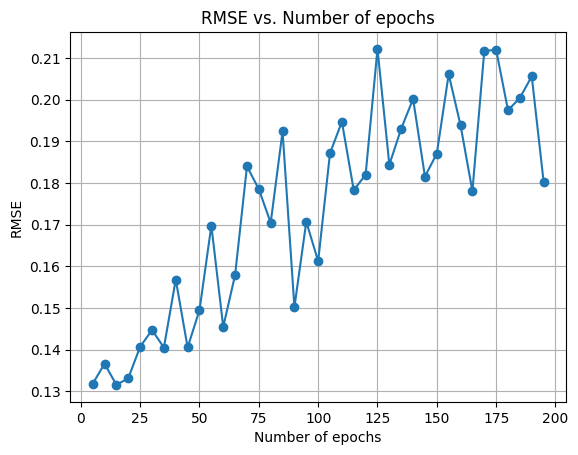

In [228]:
# Create the plot
plt.plot(x, y, marker='o', linestyle='-')
plt.title('RMSE vs. Number of epochs')
plt.xlabel('Number of epochs')
plt.ylabel('RMSE')
plt.grid(True)

# Display the plot
plt.show()

In [229]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Sample data: Features describing students and their grade percentages
# Features: [Number of students, Number of students taking advanced math class, ...]
# Target: Percentage of students with A, B, C grades
data = [
    [30, 10, 80, 25, 40],
    [40, 15, 75, 30, 45],
    [35, 12, 85, 28, 42],
    # Add more data points here
]

# Split the data into features (X) and labels (y)
X = np.array(data[:, :-3])  # Use the relevant features here
y = np.array(data[:, -3:])  # The last three columns are A, B, and C grade percentages

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-output regression model (e.g., MultiOutputRegressor with a regressor like DecisionTreeRegressor)
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor

# Create and train the multi-output regression model
model = MultiOutputRegressor(DecisionTreeRegressor(random_state=42))
model.fit(X_train, y_train)

# Make probabilistic predictions on the test data
y_pred = model.predict(X_test)

# Now, let's print the predicted grade percentages
for i in range(len(X_test)):
    print(f"Input Features: {X_test[i]}")
    print(f"Predicted A Grade Percentage: {y_pred[i][0]:.2f}%")
    print(f"Predicted B Grade Percentage: {y_pred[i][1]:.2f}%")
    print(f"Predicted C Grade Percentage: {y_pred[i][2]:.2f}%")
    print("\n")

# Evaluate the model's performance (you may need different metrics for regression)
# Calculate Mean Absolute Error (MAE) for each grade category
from sklearn.metrics import mean_absolute_error
mae_A = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
mae_B = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
mae_C = mean_absolute_error(y_test[:, 2], y_pred[:, 2])

print(f"Mean Absolute Error (A Grade): {mae_A:.2f}")
print(f"Mean Absolute Error (B Grade): {mae_B:.2f}")
print(f"Mean Absolute Error (C Grade): {mae_C:.2f}")


TypeError: list indices must be integers or slices, not tuple